In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import hdf5storage
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy
import matplotlib.patches as mpatches
import statsmodels.stats.multitest as multitest
import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
from sklearn.metrics import r2_score


In [2]:
def nansem(a, axis=1):
    return np.nanstd(a, axis=0)/np.sqrt(a.shape[axis])

In [3]:
all_cue_speech_unit_ecog = loadmat("all_cue_speech_unit_ecog.mat")

cue_mat_1_pos = all_cue_speech_unit_ecog['cue_mat_1_pos']
cue_mat_all_pos = all_cue_speech_unit_ecog['cue_mat_all_pos']
cue_mat_1_pos_sem = all_cue_speech_unit_ecog['cue_mat_1_pos_sem']
cue_mat_all_pos_sem = all_cue_speech_unit_ecog['cue_mat_all_pos_sem']
cue_mat_1_pos_speech = all_cue_speech_unit_ecog['cue_mat_1_pos_speech']
cue_mat_all_pos_speech = all_cue_speech_unit_ecog['cue_mat_all_pos_speech']
cue_mat_1_pos_speech_sem = all_cue_speech_unit_ecog['cue_mat_1_pos_speech_sem']
cue_mat_all_pos_speech_sem = all_cue_speech_unit_ecog['cue_mat_all_pos_speech_sem']

cue_mat_1_neg = all_cue_speech_unit_ecog['cue_mat_1_neg']
cue_mat_all_neg = all_cue_speech_unit_ecog['cue_mat_all_neg']
cue_mat_1_neg_sem = all_cue_speech_unit_ecog['cue_mat_1_neg_sem']
cue_mat_all_neg_sem = all_cue_speech_unit_ecog['cue_mat_all_neg_sem']
cue_mat_1_neg_speech = all_cue_speech_unit_ecog['cue_mat_1_neg_speech']
cue_mat_all_neg_speech = all_cue_speech_unit_ecog['cue_mat_all_neg_speech']
cue_mat_1_neg_speech_sem = all_cue_speech_unit_ecog['cue_mat_1_neg_speech_sem']
cue_mat_all_neg_speech_sem = all_cue_speech_unit_ecog['cue_mat_all_neg_speech_sem']

speech_mat_1_pos = all_cue_speech_unit_ecog['speech_mat_1_pos']
speech_mat_all_pos = all_cue_speech_unit_ecog['speech_mat_all_pos']
speech_mat_1_pos_sem = all_cue_speech_unit_ecog['speech_mat_1_pos_sem']
speech_mat_all_pos_sem = all_cue_speech_unit_ecog['speech_mat_all_pos_sem']
speech_mat_1_pos_speech = all_cue_speech_unit_ecog['speech_mat_1_pos_speech']
speech_mat_all_pos_speech = all_cue_speech_unit_ecog['speech_mat_all_pos_speech']
speech_mat_1_pos_speech_sem = all_cue_speech_unit_ecog['speech_mat_1_pos_speech_sem']
speech_mat_all_pos_speech_sem = all_cue_speech_unit_ecog['speech_mat_all_pos_speech_sem']

speech_mat_1_neg = all_cue_speech_unit_ecog['speech_mat_1_neg']
speech_mat_all_neg = all_cue_speech_unit_ecog['speech_mat_all_neg']
speech_mat_1_neg_sem = all_cue_speech_unit_ecog['speech_mat_1_neg_sem']
speech_mat_all_neg_sem = all_cue_speech_unit_ecog['speech_mat_all_neg_sem']
speech_mat_1_neg_speech = all_cue_speech_unit_ecog['speech_mat_1_neg_speech']
speech_mat_all_neg_speech = all_cue_speech_unit_ecog['speech_mat_all_neg_speech']
speech_mat_1_neg_speech_sem = all_cue_speech_unit_ecog['speech_mat_1_neg_speech_sem']
speech_mat_all_neg_speech_sem = all_cue_speech_unit_ecog['speech_mat_all_neg_speech_sem']

ecog_hg_onset_mean = all_cue_speech_unit_ecog['ecog_hg_onset_mean']
ecog_hg_onset_sem = all_cue_speech_unit_ecog['ecog_hg_onset_sem']


In [15]:
np.linspace(500, 4500, 5)

array([ 500., 1500., 2500., 3500., 4500.])

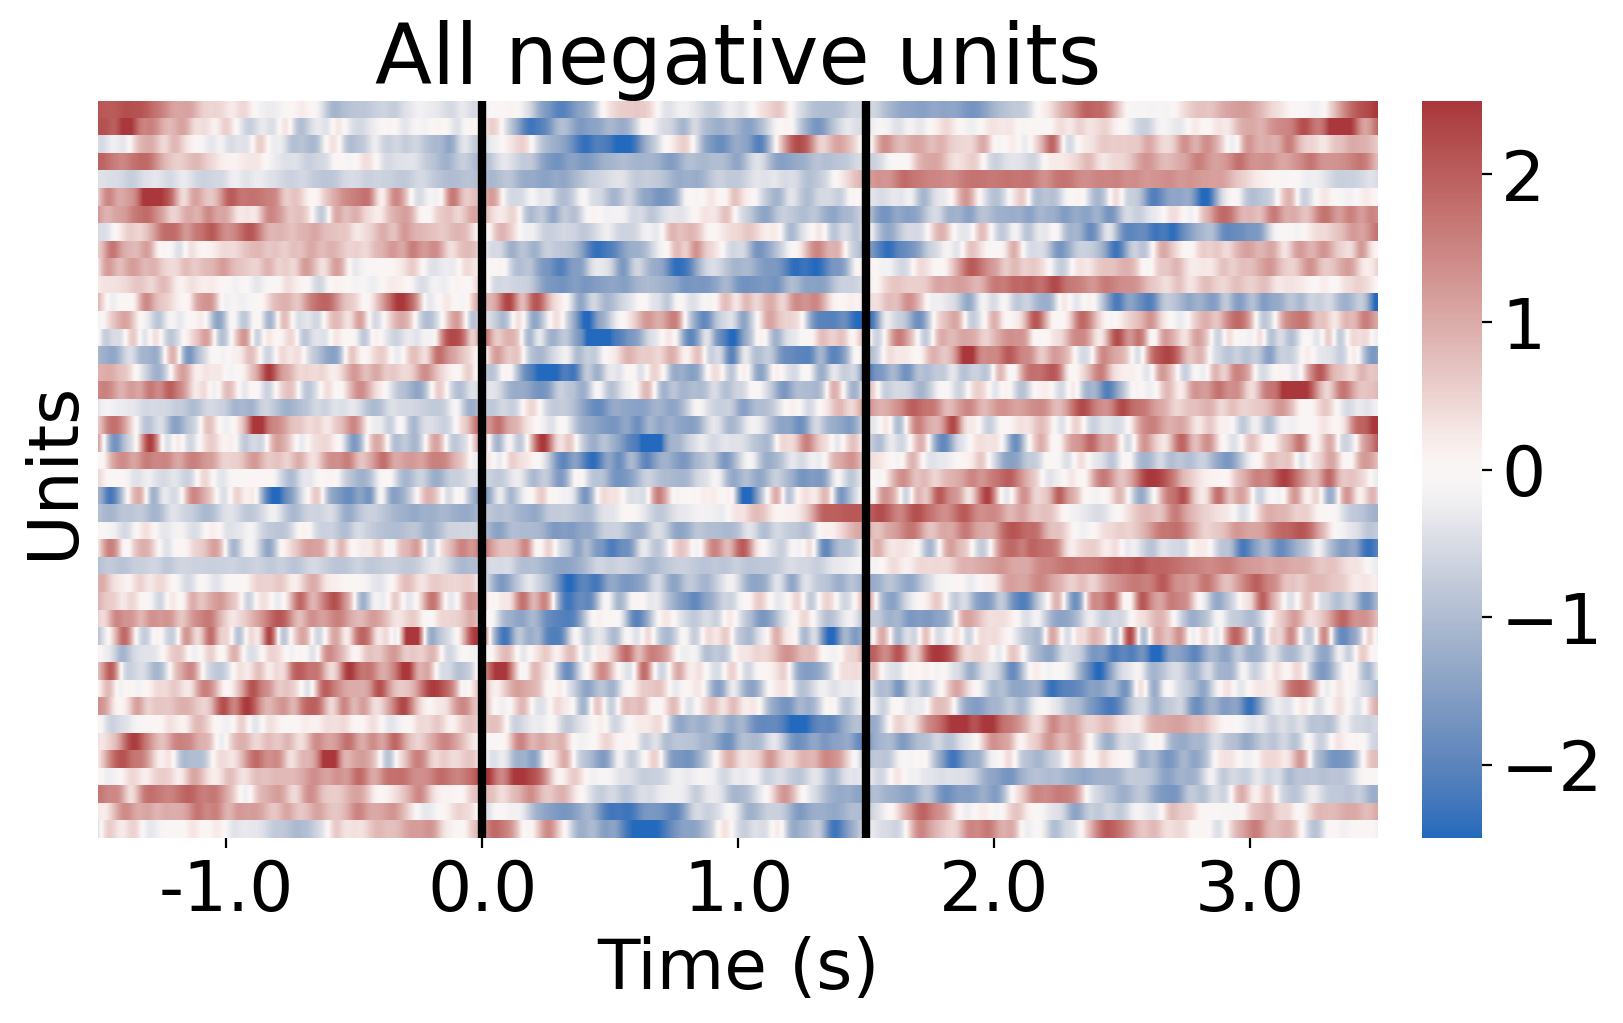

In [25]:
fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(8, 5), dpi=200)
axs.patch.set_alpha(0)

sns.heatmap(zscore(np.array(cue_mat_1_neg), axis=1), 
            cmap='vlag', ax=axs, vmin=-2.5, vmax=2.5)

axs.set_xticks(np.linspace(500, 4500, 5))
axs.set_xticklabels(np.linspace(500, 4500, 5)/1000-1.5, fontsize=25, rotation=0)
axs.set_yticks([])
axs.set_xlabel("Time (s)", fontsize=25)
axs.set_ylabel("Units", fontsize=25)
axs.axvline(1500, color='k', linewidth=3)
axs.axvline(3000, color='k', linewidth=3)
cbar = axs.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)

plt.title("All negative units", fontsize=30);

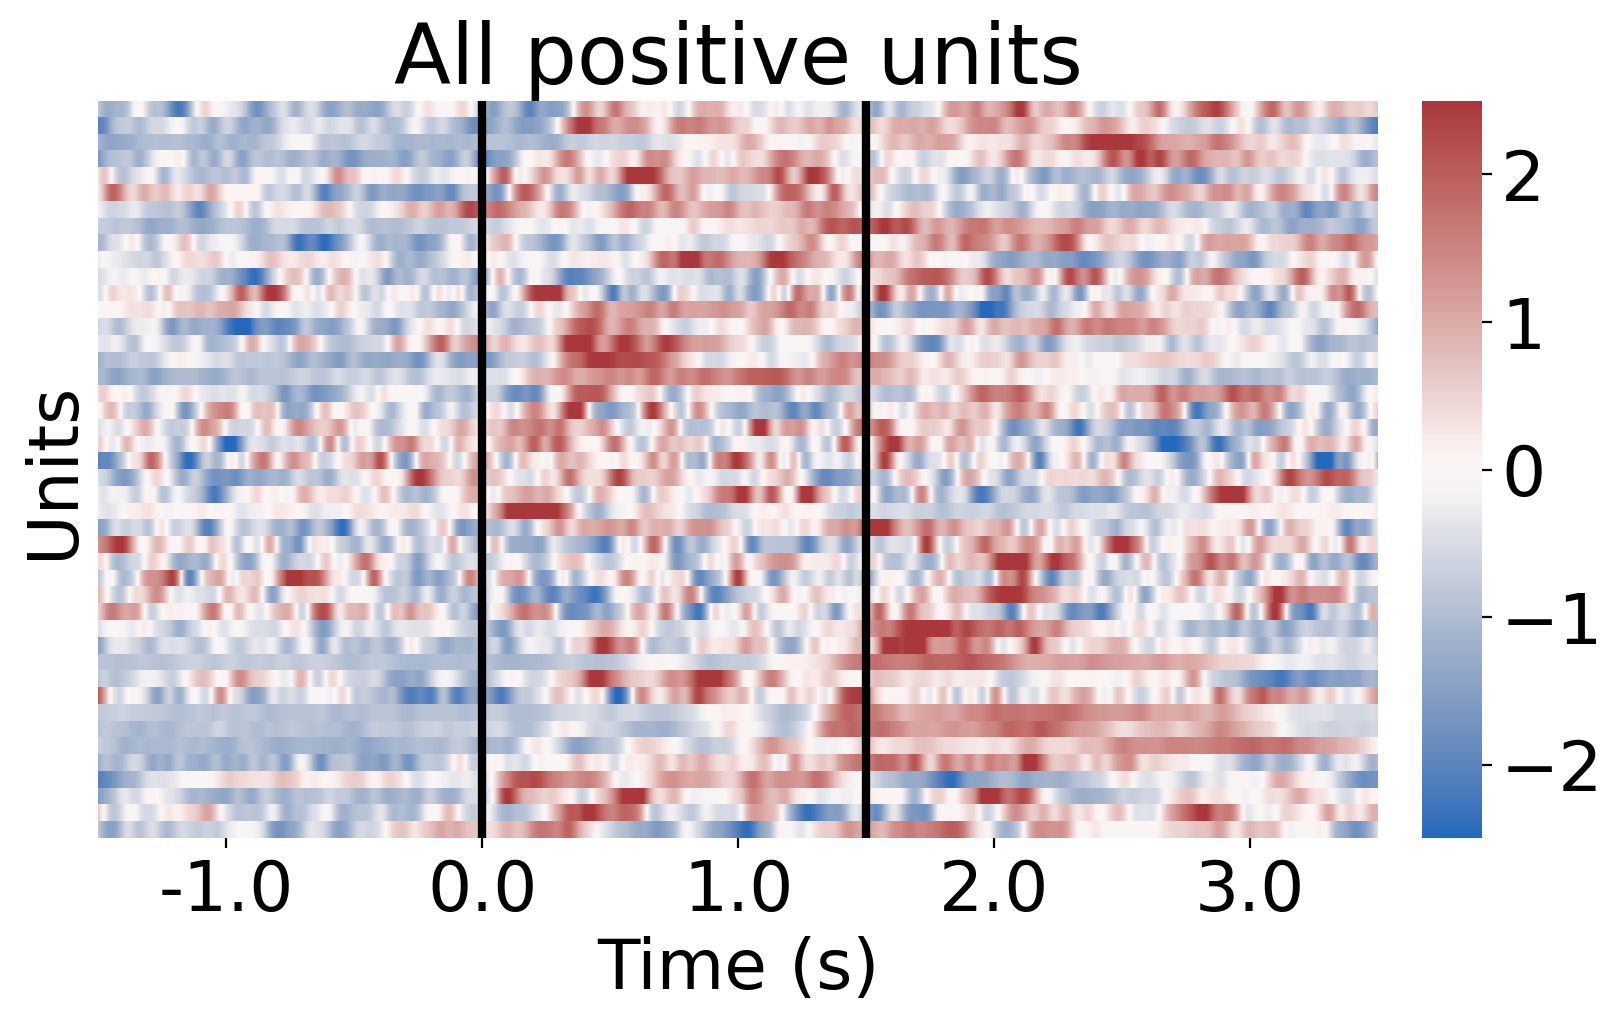

In [26]:
fig, axs = plt.subplots(1, 1, constrained_layout=1, figsize=(8, 5), dpi=200)
axs.patch.set_alpha(0)

sns.heatmap(zscore(np.array(cue_mat_1_pos), axis=1), 
            cmap='vlag', vmax=2.5, ax=axs, vmin=-2.5)

axs.set_xticks(np.linspace(500, 4500, 5))
axs.set_xticklabels(np.linspace(500, 4500, 5)/1000-1.5, fontsize=25, rotation=0)
axs.set_yticks([])
axs.set_xlabel("Time (s)", fontsize=25)
axs.set_ylabel("Units", fontsize=25)
axs.axvline(1500, color='k', linewidth=3)
axs.axvline(3000, color='k', linewidth=3)
cbar = axs.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)

plt.title("All positive units", fontsize=30);